# Imports

In [5]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist, cifar10
from keras.utils import to_categorical
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

# PART 1 MNIST CNN
---
# Load Data (1 point)
* Load mnist data from a keras module (if that does not work, find a way to download it online)

In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess Data (2 points)
* Perform any preprocesssing you think is necessary
    * Reshaping images
    * Scaling pixel values
    * Changing target values
    * etc.

In [14]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# MNIST (7 points)
---
Build CNN 
* At least 3 layers

In [15]:
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train (5 points)
* At least 10 epochs

In [16]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 179s 3ms/step - loss: 3.7590 - acc: 0.7407 - val_loss: 0.0818 - val_acc: 0.9747
Epoch 2/10
60000/60000 [==============================] - 175s 3ms/step - loss: 0.0753 - acc: 0.9786 - val_loss: 0.0686 - val_acc: 0.9791
Epoch 3/10
60000/60000 [==============================] - 168s 3ms/step - loss: 0.0477 - acc: 0.9850 - val_loss: 0.0848 - val_acc: 0.9785
Epoch 4/10
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0341 - acc: 0.9892 - val_loss: 0.0898 - val_acc: 0.9767
Epoch 5/10
60000/60000 [==============================] - 159s 3ms/step - loss: 0.0256 - acc: 0.9919 - val_loss: 0.0957 - val_acc: 0.9792
Epoch 6/10
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0230 - acc: 0.9933 - val_loss: 0.1250 - val_acc: 0.9784
Epoch 7/10
60000/60000 [==============================] - 158s 3ms/step - loss: 0.0258 - acc: 0.9926 - val_loss: 0.1043 - 

# Training Curves (5 points)
* Plot training accuracy & loss, validation accuracy and loss over time
* Loss should be in one plot. Accuracy in another

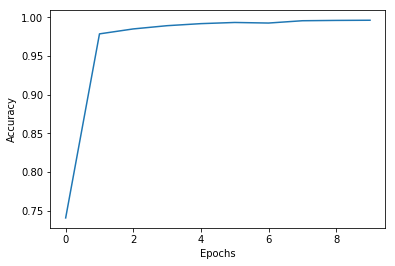

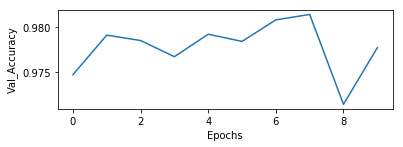

In [28]:
temp_acc = model.history.history['acc']
val_temp_acc = model.history.history['val_acc']
temp_loss = model.history.history['loss']
val_temp_loss = model.history.history['val_loss']

plt.subplot(1,1,1)
plt.plot(temp_acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

plt.subplot(2,1,1)
plt.plot(val_temp_acc)
plt.xlabel("Epochs")
plt.ylabel("Val_Accuracy")
plt.show()

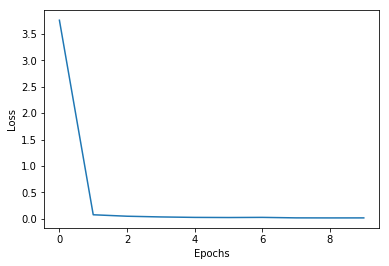

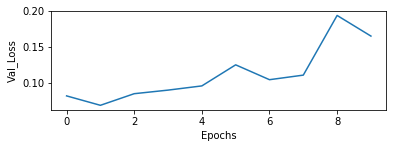

In [29]:
plt.subplot(1,1,1)
plt.plot(temp_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

plt.subplot(2,1,1)
plt.plot(val_temp_loss)
plt.xlabel("Epochs")
plt.ylabel("Val_Loss")
plt.show()

# PART 2 CIFAR CNN (10 points)
---
Build CNN and train it on the CIFAR dataset

In [38]:
cifar = keras.datasets.cifar10.load_data()
(x_train, y_train), (x_test, y_test) = cifar

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

# Train (5 points)

In [40]:
num_classes = 10

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 172s 3ms/step - loss: 1.5021 - acc: 0.4541 - val_loss: 1.1599 - val_acc: 0.5849
Epoch 2/50
50000/50000 [==============================] - 176s 4ms/step - loss: 1.1067 - acc: 0.6065 - val_loss: 0.9521 - val_acc: 0.6664
Epoch 3/50
50000/50000 [==============================] - 179s 4ms/step - loss: 0.9650 - acc: 0.6609 - val_loss: 0.8006 - val_acc: 0.7193
Epoch 4/50
50000/50000 [==============================] - 180s 4ms/step - loss: 0.8818 - acc: 0.6908 - val_loss: 0.7929 - val_acc: 0.7228
Epoch 5/50
50000/50000 [==============================] - 180s 4ms/step - loss: 0.8231 - acc: 0.7089 - val_loss: 0.7429 - val_acc: 0.7459
Epoch 6/50
50000/50000 [==============================] - 180s 4ms/step - loss: 0.7793 - acc: 0.7256 - val_loss: 0.7245 - val_acc: 0.7457
Epoch 7/50
50000/50000 [==============================] - 181s 4ms/step - loss: 0.7492 - acc: 0.7375 - val_loss: 0.7143 - 

# Training Curves (5 points)
* Plot training accuracy & loss, validation accuracy and loss over time
* Loss should be in one plot. Accuracy in another

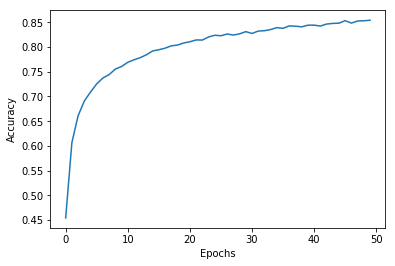

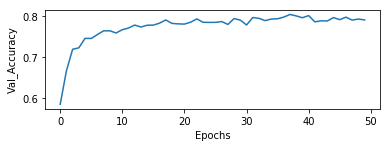

In [41]:
temp_acc = model.history.history['acc']
val_temp_acc = model.history.history['val_acc']
temp_loss = model.history.history['loss']
val_temp_loss = model.history.history['val_loss']

plt.subplot(1,1,1)
plt.plot(temp_acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

plt.subplot(2,1,1)
plt.plot(val_temp_acc)
plt.xlabel("Epochs")
plt.ylabel("Val_Accuracy")
plt.show()

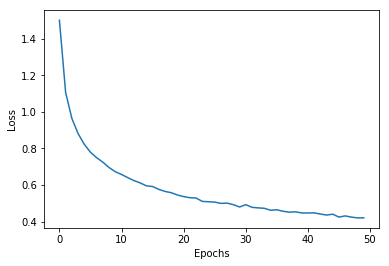

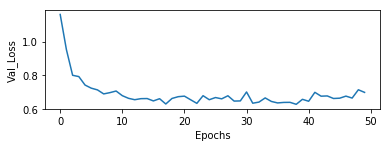

In [42]:
plt.subplot(1,1,1)
plt.plot(temp_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

plt.subplot(2,1,1)
plt.plot(val_temp_loss)
plt.xlabel("Epochs")
plt.ylabel("Val_Loss")
plt.show()

**Questions:** 
* **Q:** How do the loss and accuracy values on MNIST and CIFAR with CNNs compare to the results you saw in homework 1?  
* **A:** The accuracry values are higher and the loss values are lower relative the results of homework 1.
* **Q:** What causes this difference in results?
* **A:** The difference in results is caused by the fact that the CNNs are not flattening the image into a 1D array until the neural network is almost finished, so the network can calculate the everything based on the whole image rather than a flattened version. Where in the regular Dense networks, the image was prepocessed to fit into a 1D array that can be analyzed. This means the network has to go pixel by pixel rather than a group of pixels like a CNN.

# PART 3 PRETRAINED MODEL
---
# 3.1 Resnet (1 point)
* Import a pretrained Resnet from keras
* Using weights trained on Imagenet

In [126]:
cifar = keras.datasets.cifar10.load_data()

batch_size = 32
nb_classes = 10
nb_epoch = 200
data_augmentation = True

img_rows, img_cols = 32, 32
img_channels = 3

(x_train, y_train), (x_test, y_test) = cifar
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

input_shape = x_train.shape[1:]

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

model = ResNet50(include_top=False, input_shape=input_shape, weights='imagenet')
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 3.2 Plot the model (2 points)

In [127]:
#from keras.utils import plot_model

#plot_model(model)

#This is the right code as far as I could find for plotting the model, but for some reason Graphiz and my computer just don't get 
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 16, 16, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

# 3.3 Fine tunning (7 points)
* Fine tune only the last layer on CIFAR

In [128]:
num_classes = 10
x = model.output
x = Flatten()(x)
predictions = Dense(num_classes, activation='softmax')(x)

new_model = Model(input=model.input, output=predictions)
new_model.compile(optimizer="adagrad", loss="categorical_crossentropy")

#new_model.evaluate(x_test, y_test)
new_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

c:\users\ryank\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 2589s 52ms/step - loss: 2.4566 - val_loss: 1.9888
Epoch 2/5
14592/50000 [=======>......................] - ETA: 28:58 - loss: 1.9010

KeyboardInterrupt: 

# PART 4 
---
# 4.1 UNet (10 points)
* Build a UNet

In [ ]:
from keras_unet.models import vanilla_unet
from keras.models import *
from keras.layers import *
from keras.optimizers import *

(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train.reshape(-1, 28, 28, 1)
x_test.reshape(-1, 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255



model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2DTranspose(11, kernel_size=3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# 4.2 Build custom training set (10 points)
* Here you will need to convert **MNIST** images into segmented images
* For example if I have an image of a 5, the input to the network is the same image (unchanged)
* The target, however, should have the one hot label of '5' at all locations where the pixels are greater than zero (i.e. not black)

In [118]:
black = [0,0,0,0,0,0,0,0,0,0,1]
temp_ytrain = []
temp_ytest = []

for i in range(0, y_train.shape[0]):
    storage = np.zeros((28, 28, 11))
    placeholder = [0,0,0,0,0,0,0,0,0,0,0]
    number = y_train[i]
    
    placeholder[number] = 1

    x= x_train[i]
    storage[(x>0).squeeze()] = placeholder
    storage[(x==0).squeeze()] = black
    
    temp_ytrain.append(storage)

for i in range(0, y_test.shape[0]):
    storage = np.zeros((28, 28, 11))
    placeholder = [0,0,0,0,0,0,0,0,0,0,0]
    number = y_test[i]
    
    placeholder[y_test[i]] = 1
    
    x = x_test[i]
    storage[(x>0).squeeze()] = placeholder
    storage[(x==0).squeeze()] = black
    
    temp_ytest.append(storage)
    
y_train = np.asarray(temp_ytrain)
y_test = np.asarray(temp_ytest)

# 4.3 Training (5 points)

In [119]:
x_train = np.expand_dims(x_train, axis = 3)
x_test = np.expand_dims(x_test, axis = 3)

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 129s 2ms/step - loss: 0.5415 - acc: 0.8313 - val_loss: 0.4593 - val_acc: 0.8328
Epoch 2/5
60000/60000 [==============================] - 73s 1ms/step - loss: 0.4493 - acc: 0.8376 - val_loss: 0.4481 - val_acc: 0.8375
Epoch 3/5
60000/60000 [==============================] - 73s 1ms/step - loss: 0.4378 - acc: 0.8407 - val_loss: 0.4348 - val_acc: 0.8405
Epoch 4/5
60000/60000 [==============================] - 74s 1ms/step - loss: 0.4270 - acc: 0.8437 - val_loss: 0.4268 - val_acc: 0.8433
Epoch 5/5
60000/60000 [==============================] - 76s 1ms/step - loss: 0.4195 - acc: 0.8456 - val_loss: 0.4204 - val_acc: 0.8444


# 4.4 Results (5 points)
* Plot training and validation loss over time
* Show a predicted sample side by side with the original

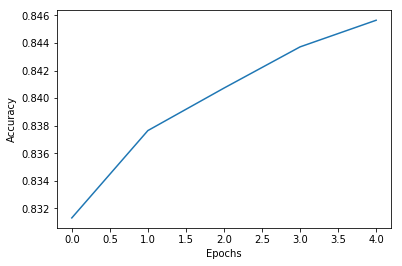

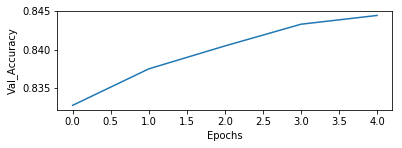

In [120]:
temp_acc = model.history.history['acc']
val_temp_acc = model.history.history['val_acc']
temp_loss = model.history.history['loss']
val_temp_loss = model.history.history['val_loss']

plt.subplot(1,1,1)
plt.plot(temp_acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

plt.subplot(2,1,1)
plt.plot(val_temp_acc)
plt.xlabel("Epochs")
plt.ylabel("Val_Accuracy")
plt.show()

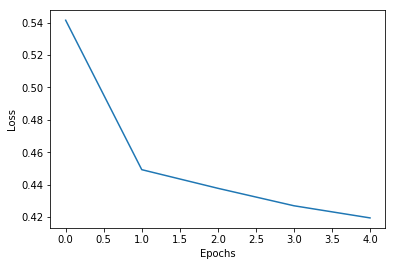

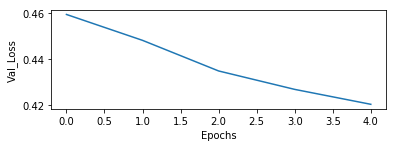

In [121]:
plt.subplot(1,1,1)
plt.plot(temp_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

plt.subplot(2,1,1)
plt.plot(val_temp_loss)
plt.xlabel("Epochs")
plt.ylabel("Val_Loss")
plt.show()